In [ ]:
!pip install "laspy[lazrs, laszip]"
!pip install pandas

In [1]:
import numpy as np
import laspy

import pandas as pd

In [2]:
point_cloud = laspy.read('cloud_point/ground_crs.laz')
point_cloud

<LasData(1.4, point fmt: <PointFormat(7, 0 bytes of extra dims)>, 75793719 points, 2 vlrs)>

In [ ]:
list(point_cloud.point_format.dimension_names)

In [ ]:
set(list(point_cloud.classification))

In [ ]:
point_data = np.stack([point_cloud.X, point_cloud.Y, point_cloud.Z, point_cloud.red, point_cloud.green, point_cloud.blue], axis=0).transpose((1, 0))
point_data

In [ ]:
point_cloud.shape

In [3]:
dataset = pd.DataFrame({'X':np.array(point_cloud.x),
                        'Y':np.array(point_cloud.y),
                        'Z':np.array(point_cloud.z),
                        'R':point_cloud.red,
                        'G':point_cloud.green,
                        'B':point_cloud.blue})
dataset.head()

,X,Y,Z,R,G,B
0,14305.733439,159502.479094,32.196214,24672,37008,21331
1,14228.400764,159511.738770,40.356614,15420,29041,10280
2,13954.921735,159350.928687,18.672114,0,0,0
3,14013.836739,159414.456967,20.296914,17990,28784,18761
4,14169.938953,159278.326749,40.823214,21588,30326,19018


In [5]:
list(point_cloud.x)

In [4]:
dataset.to_pickle('ground_pc.pkl')

In [5]:
dataset.astype('float32')
dataset.to_pickle('ground_32.pkl')

In [16]:
dataset['R'] = dataset['R'].astype('uint16')
# dataset['Z'] = dataset['Z'].astype('float32')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75793719 entries, 0 to 75793718
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   X       float32
 1   Y       float32
 2   Z       float32
 3   R       uint16 
 4   G       uint16 
 5   B       uint16 
dtypes: float32(3), uint16(3)
memory usage: 1.3 GB


In [12]:
# dataset.to_pickle('ground_32.pkl')

In [13]:
dataset.head()

,X,Y,Z,R,G,B
0,14305.733398,159502.484375,32.196213,24672,37008,21331
1,14228.400391,159511.734375,40.356613,15420,29041,10280
2,13954.921875,159350.921875,18.672113,0,0,0
3,14013.836914,159414.453125,20.296913,17990,28784,18761
4,14169.938477,159278.328125,40.823215,21588,30326,19018


In [ ]:
colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()

In [ ]:
factor=10
decimated_points_random = point_data[::factor]

## Load pickle file

In [41]:
df = pd.read_pickle('ground_32.pkl')
df.info

<bound method DataFrame.info of                      X              Y          Z      R      G      B
0         14305.733398  159502.484375  32.196213  24672  37008  21331
1         14228.400391  159511.734375  40.356613  15420  29041  10280
2         13954.921875  159350.921875  18.672113      0      0      0
3         14013.836914  159414.453125  20.296913  17990  28784  18761
4         14169.938477  159278.328125  40.823215  21588  30326  19018
...                ...            ...        ...    ...    ...    ...
75793714  14817.978516  160251.234375  78.593483  30840  37522  22359
75793715  14816.956055  160242.375000  82.468178  30840  47802  30840
75793716  14816.641602  160242.234375  84.709282  48316  62708  45232
75793717  14818.498047  160238.484375  83.778778  35723  53713  40349
75793718  14816.413086  160238.250000  83.189377  36237  52428  33153

[75793719 rows x 6 columns]>

## Visualize

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [42]:
df_vis = df.sample(400000)
df = []
df_vis.info

<bound method DataFrame.info of                      X              Y          Z      R      G      B
66277763  14464.186523  159892.375000  39.365314  33410  35980  34952
51673831  14242.568359  159702.109375  36.540379  41634  42148  38807
52676224  14263.782227  159738.015625  39.222080  31611  44204  19275
14436205  14125.349609  159387.734375  20.003714  28013  35466  19532
11899525  14776.157227  160078.015625  76.116180  40349  53456  31868
...                ...            ...        ...    ...    ...    ...
6112099   14406.070312  159609.796875  55.230515  39835  54998  43433
60820747  14691.117188  159734.093750  41.942287  32896  46517  26728
366632    14519.823242  159498.265625  56.328213  18504  32639  20817
12318578  14877.404297  160045.562500  96.808479  36751  49087  39578
59513816  14575.844727  159715.500000  49.681187  35466  49344  30069

[400000 rows x 6 columns]>

In [29]:
df_vis['R']

56341272    25957
41053230    20303
38714675     3341
4940103     41891
37074572    26214
            ...  
68883445    37522
4677349     26985
49724564    32896
67582929    28013
6768345      4112
Name: R, Length: 100000, dtype: uint16

In [43]:
def color(r,g,b):
    return [r/256,g/256,b/256]
df_vis['RGB'] = df_vis.apply(lambda x: [x['R']/65278,x['G']/65278,x['B']/65278], axis=1)
df_vis.head()

,X,Y,Z,R,G,B,RGB
66277763,14464.186523,159892.375000,39.365314,33410,35980,34952,"[0.5118110236220472, 0.5511811023622047, 0.535..."
51673831,14242.568359,159702.109375,36.540379,41634,42148,38807,"[0.6377952755905512, 0.6456692913385826, 0.594..."
52676224,14263.782227,159738.015625,39.222080,31611,44204,19275,"[0.484251968503937, 0.6771653543307087, 0.2952..."
14436205,14125.349609,159387.734375,20.003714,28013,35466,19532,"[0.42913385826771655, 0.5433070866141733, 0.29..."
11899525,14776.157227,160078.015625,76.116180,40349,53456,31868,"[0.6181102362204725, 0.8188976377952756, 0.488..."


In [4]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(df['X'], df['Y'],df['Z'], rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.title('Original Code')
fig.tight_layout()
plt.show()

NameError: name 'plt' is not defined

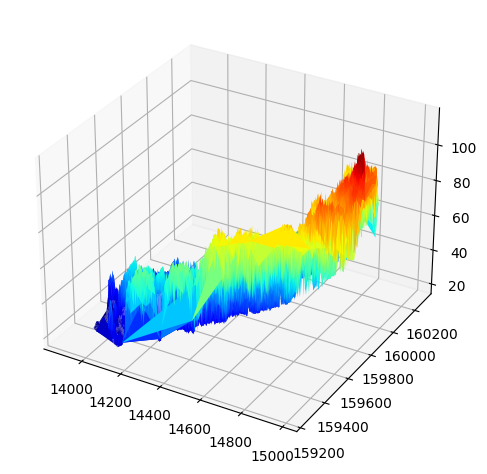

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(df_vis.X, df_vis.Y, df_vis.Z, cmap=cm.jet, linewidth=0.2)
fig.tight_layout()
plt.show()

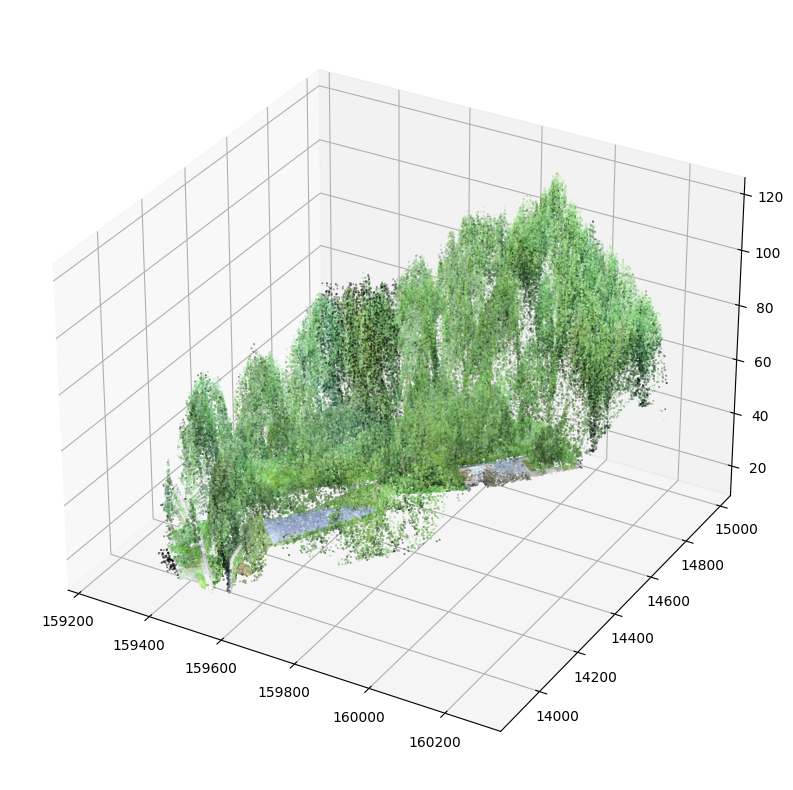

In [46]:
fig = plt.figure(figsize=(10, 10))
# ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_vis.Y, df_vis.X,  df_vis.Z, c = df_vis.RGB,s =0.1)
plt.show()

In [ ]:
## Generate DTM from ground.las
LASfile <- system.file("extdata",groundlas, package='lidR')
las <- readLAS(LASfile,select = "xyzc")

## Rasterize 
dtm_tin <- rasterize_terrain(las, res =1, algorithm = tin())


In [ ]:
# read las file
# LASfile <- system.file("extdata", lasfile_name, package="lidR")
las <- readLAS(LASfile)

# classify ground points
mycsf <- csf(sloopt_smooth = TRUE, class_threshold = 1,
             cloth_resolution = 1, time_step =1)

las <- classify_ground(las, mycsf) #cloth simulation function

# get ground point clouds
gnd <- filter_ground(las)



# Local Maximum Filter - Individual Tree Identification

ttops <- locate_trees(las, lmf(ws = 5)) #customize window size


